# Regression with a Flood Prediction Dataset

## corelacao de pearson

# pip install
##   tensorflow,
##  numpy
##   scikeras
##   seaborn
##   pandas
##   matplotlib
##   sklearn
##   


In [14]:
import pandas as pd 
import seaborn as sns
import numpy as np
import torch
import cv2
import keras_core as keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import scikeras
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
import os
import csv
import shutil
from PIL import Image
import matplotlib

verbose = 0

salvando validacao treino e teste

In [15]:
df = pd.read_csv(r"C:\Users\CaioM\edital109-arthur\digise\CXR8\CXR8\Data_Entry_2017_v2020.csv")

In [16]:

df['Finding Labels'] = df['Finding Labels'].apply(lambda x: x.split('|'))
#df.drop('Image Index', inplace=True, axis= 1)
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(df['Finding Labels'])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)
df_final = pd.concat([df.drop('Finding Labels', axis=1), one_hot_df], axis=1)
df_dum = pd.get_dummies(df_final['Patient Gender'])
df_final = pd.concat([df_final.drop('Patient Gender', axis=1), df_dum], axis=1)
df_dum2 = pd.get_dummies(df_final['View Position'])
df_final = pd.concat([df_final.drop('View Position', axis=1), df_dum2], axis=1)
df_final = df_final.drop('Follow-up #',axis=1)
pd.set_option('display.max_columns', None)


df_final['Image Index'] = df_final['Image Index'].str.replace('.png', '', regex=False)
df_final

,Image Index,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,F,M,AP,PA
0,00000001_000,1,57,2682,2749,0.143,0.143,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,True,False,True
1,00000001_001,1,58,2894,2729,0.143,0.143,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,False,True,False,True
2,00000001_002,1,58,2500,2048,0.168,0.168,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,False,True,False,True
3,00000002_000,2,80,2500,2048,0.171,0.171,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,True,False,True
4,00000003_001,3,74,2500,2048,0.168,0.168,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001,30801,38,2048,2500,0.168,0.168,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,False,True,False,True
112116,00030802_000,30802,28,2048,2500,0.168,0.168,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,True,False,True
112117,00030803_000,30803,42,2048,2500,0.168,0.168,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,True,False,False,True
112118,00030804_000,30804,29,2048,2500,0.168,0.168,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,True,False,False,True


## Dividir as imagens em pastas diferentes (somente se tiver mais de 70 mil imagens)

In [17]:
# import os
# import shutil

# def dividir_imagens(pasta_origem, pasta_destino):
#     # Verifica se a pasta de destino existe, se não, cria-a
#     if not os.path.exists(pasta_destino):
#         os.makedirs(pasta_destino)

#     # Lista todos os arquivos da pasta de origem
#     arquivos = [f for f in os.listdir(pasta_origem) if os.path.isfile(os.path.join(pasta_origem, f))]

#     # Filtra apenas as imagens (jpeg, jpg, png, etc.)
#     imagens = [f for f in sorted(arquivos) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

#     # Calcula a metade da lista de imagens
#     metade = len(imagens) // 2

#     # Move a metade das imagens (de cima para baixo) para a pasta de destino
#     for imagem in imagens[:metade]:
#         caminho_origem = os.path.join(pasta_origem, imagem)
#         caminho_destino = os.path.join(pasta_destino, imagem)
#         shutil.move(caminho_origem, caminho_destino)

#     print(f"{metade} imagens movidas para a pasta {pasta_destino}")

# # Exemplo de uso
# pasta_origem = 'dataset/images'
# pasta_destino = 'dataset/images2'

# dividir_imagens(pasta_origem, pasta_destino)



# leitura dos dados

In [18]:

# # Diretório onde as pastas serão criadas
# base_directory = 'dataset'
# source_directory = r'C:\Users\CaioM\edital109-arthur\digise\CXR8\CXR8\dataset\images2'
#         # Cria o diretório base se não existir
# if not os.path.exists(base_directory):
#     os.makedirs(base_directory)

# # Cria pastas com base nos títulos das colunas
# for column in df_final.columns[7:22]:  # Ajuste o índice de coluna se necessário
#     folder_path = os.path.join(base_directory, column)
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)
#         print(f'Pasta criada: {folder_path}')
#     else:
#         print(f'Pasta já existe: {folder_path}')

# # Move as imagens para as pastas apropriadas com base nos rótulos
# for index, row in df_final.iterrows():
#     image_name = row['Image Index'] + '.png'
#     image_path = os.path.join(source_directory, image_name)
    
#     if not os.path.exists(image_path):
#         print(f'Imagem não encontrada: {image_path}')
#         continue
#     # Itera sobre as colunas de rótulos
#     for column in df_final.columns[7:22]:
#         if row[column] == 1:  # Verifica se o rótulo está ativo
#             folder_path = os.path.join(base_directory, column)
#             destination_path = os.path.join(folder_path, image_name)
#             shutil.copy2(image_path, destination_path)
#             print(f'Imagem movida: {image_path} -> {destination_path}')
#         else:
#             print(f'Imagem {image_name} não movida para {column} (valor: {row[column]})')

# plot da matriz de correlação


# análise de correlação

<Axes: >

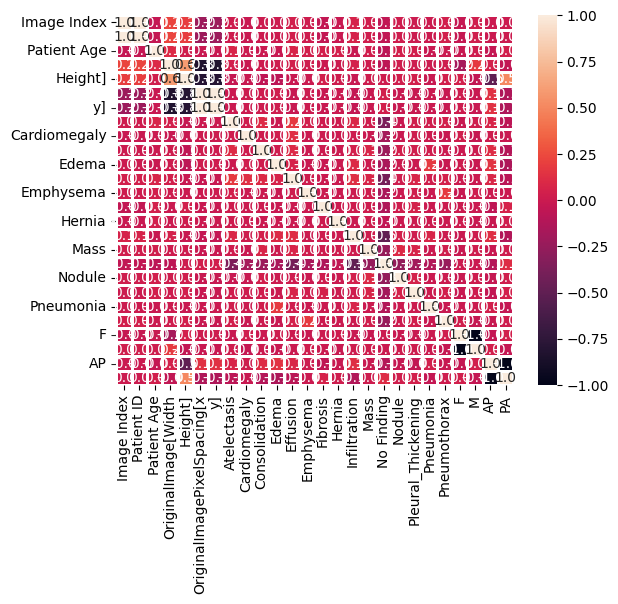

In [19]:
correlation = df_final.corr()
sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=1)



In [20]:
dataset = keras.utils.image_dataset_from_directory('dataset',batch_size=1,image_size=(1024,1024))

train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)


Found 141537 files belonging to 15 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1024, 1024, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

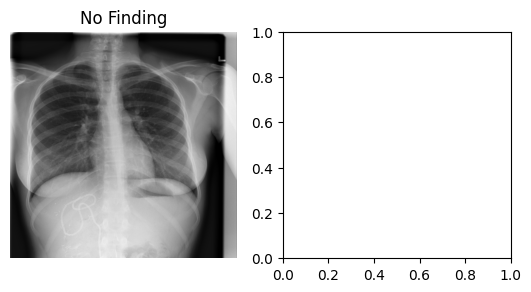

In [21]:
plt.figure(figsize=(10, 10))
class_names=['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
print(dataset)
for images, classes in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[int(classes[i])])
        plt.axis("off")

## Create a model with optimizer and init


In [22]:
input_shape = (1024,1024,3)
num_classes = 15
model = keras.Sequential(
    [
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="sigmoid",input_shape=input_shape),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="sigmoid"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32,activation='sigmoid'),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

print(model.summary())

c:\Users\CaioM\.conda\envs\pytorch\lib\site-packages\keras_core\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 1022, 1022, 32)    │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1020, 1020, 16)    │      4,624 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_average_pooling2d_1      │ (None, 16)                │          0 │
│ (GlobalAveragePooling2D)        │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 32)                │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 15)                │        495 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 6,559 (25.62 KB)

 Trainable params: 6,559 (25.62 KB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        'accuracy'],
)


##

In [24]:
history = model.fit(
    train_dataset,
    epochs=10,  # Ajuste o número de épocas conforme necessário
    validation_data=test_dataset,
)

Epoch 1/10
99075/99075 ━━━━━━━━━━━━━━━━━━━━ 22037s 222ms/step - accuracy: 0.4260 - loss: 2.0064 - val_accuracy: 0.4291 - val_loss: 1.9923
Epoch 2/10
99075/99075 ━━━━━━━━━━━━━━━━━━━━ 22047s 223ms/step - accuracy: 0.4262 - loss: 1.9934 - val_accuracy: 0.4291 - val_loss: 1.9926
Epoch 3/10
99075/99075 ━━━━━━━━━━━━━━━━━━━━ 22024s 222ms/step - accuracy: 0.4263 - loss: 1.9945 - val_accuracy: 0.4291 - val_loss: 1.9923
Epoch 4/10
80818/99075 ━━━━━━━━━━━━━━━━━━━━ 1:02:14 205ms/step - accuracy: 0.4265 - loss: 1.9926

KeyboardInterrupt: 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.42574816942214966, 0.42583900690078735, 0.4258289039134979, 0.425798624753952, 0.4258491098880768, 0.4258188307285309, 0.4258289039134979, 0.4258289039134979, 0.4258289039134979, 0.4258289039134979]
[0.4279826581478119, 0.4279591143131256, 0.4279591143131256, 0.4279591143131256, 0.4279591143131256, 0.42800623178482056, 0.4279591143131256, 0.42793557047843933, 0.4279826581478119, 0.42800623178482056]


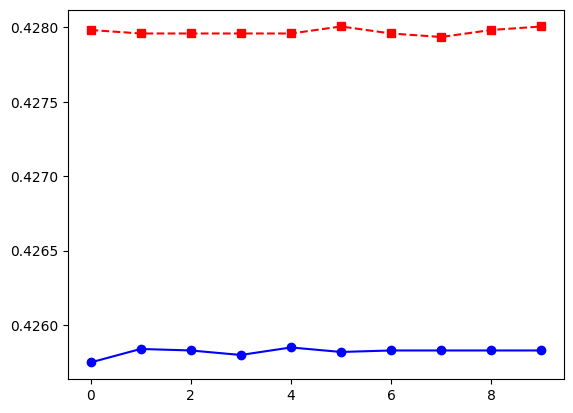

In [ ]:
print(history.history.keys())
print(history.history['accuracy'])
print(history.history['val_accuracy'])
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='b', label='Linha 1')
plt.plot(history.history['val_accuracy'], marker='s', linestyle='--', color='r', label='Linha 2')
plt.show()

In [ ]:
device = torch.cuda.get_device_name(0)
print(f"Nome da placa de vídeo: {device}")
print(f"Versão do CUDA: {torch.version.cuda}")
print(f"Número de GPUs disponíveis: {torch.cuda.device_count()}")